<h1>Exploring Titanic Dataset</h1>
<h3>by Javier Villarroel</h3>



In [1]:
#Libraries to import

import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Import dataset 
# this dataset was take from titanic dataset competition

train = pandas.read_csv('train.csv')
test = pandas.read_csv('test.csv')

In [3]:
#print(train.head())
#print(test.head())
#print(train.shape)
#print(test.shape)
#print(train.columns)
#print(test.columns)

VARIABLE DESCRIPTIONS:

<table width="100%">
  <tbody>
      <tr>
      <td>PassengerId <br>
      </td>

      <td> Passenger Identity Number <br>
      </td>
    </tr>
  
    <tr>
      <td>
        <p>Survived</p>
      </td>

      <td>Survival (1 = Yes, 0&nbsp;=&nbsp;No)</td>
    </tr>

    <tr>
      <td>PClass</td>

      <td>
        <p>Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</p>
      </td>
    </tr>

    <tr>
      <td>Name</td>

      <td>Passanger Name</td>
    </tr>
    
        <tr>
      <td>Sex<br>
      </td>

      <td>Gender<br>
      </td>
    </tr>

    <tr>
      <td>Age</td>

      <td>Age</td>
    </tr>

    <tr>
      <td>Sibsp<br>
      </td>

      <td>Number of Siblings/&nbsp;Spouses Aboard<br>
      </td>
    </tr>

    <tr>
      <td>Parch</td>

      <td>Number of Parents/ Children Aboard</td>
    </tr>

    <tr>
      <td>Ticket<br>
      </td>

      <td>Ticket Number<br>
      </td>
    </tr>

    <tr>
      <td>Fare</td>

      <td>Passenger Fare</td>
    </tr>

    <tr>
      <td>Cabin</td>

      <td>Cabin</td>
    </tr>

    <tr>
      <td>Embarked</td>

      <td>Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</td>
    </tr>
  </tbody>
</table>

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#The data of the Cabin column have 77% NaN
#Names don't expect to have any relation with the survived of the people
#The same for tickets
train = train.drop('PassengerId', axis=1)
train = train.drop('Cabin', axis=1)
train = train.drop('Name', axis=1)
train = train.drop('Ticket', axis=1)
test = test.drop('PassengerId', axis=1)
test = test.drop('Cabin', axis=1)
test = test.drop('Name', axis=1)
test = test.drop('Ticket', axis=1)


In [6]:
#Exploring data

#print(train['Survived'].value_counts())
#print(train['Pclass'].value_counts())
#print(train['Sex'].value_counts())
#print(train['Age'].value_counts())
#print(train['SibSp'].value_counts())
#print(train['Parch'].value_counts())
#print(train['Fare'].value_counts())
#print(train['Embarked'].value_counts())

In [7]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

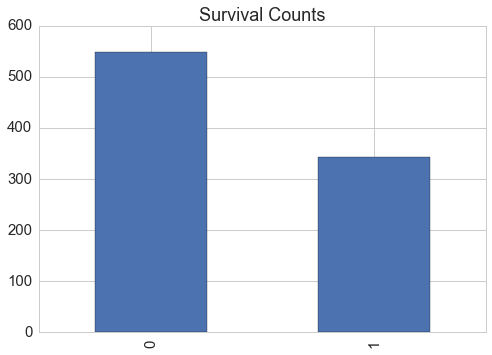

In [8]:
train['Survived'].value_counts().plot(kind='bar', title='Survival Counts')

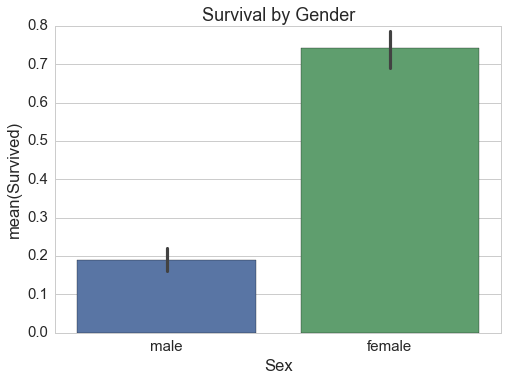

In [9]:
sns.barplot(x="Sex", y="Survived", data=train)
sns.plt.title('Survival by Gender')

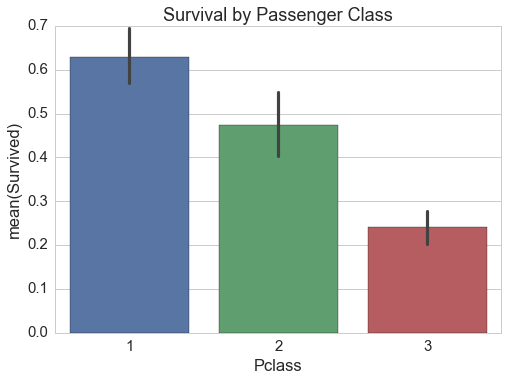

In [10]:
sns.barplot(x="Pclass", y="Survived", data=train)
sns.plt.title('Survival by Passenger Class')

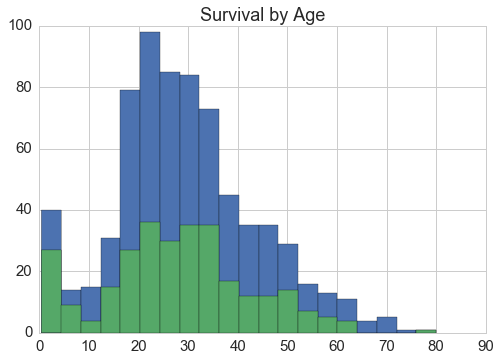

In [11]:
train["Age"].hist(bins=20)
train[train['Survived']==1]["Age"].hist(bins=20)
sns.plt.title('Survival by Age')

In [12]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



from sklearn.metrics import accuracy_score

In [13]:
#Tranform the data to numeric values

train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'female' else 0)
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'female' else 0)

def embarked_num(value):
    if value == 'S':
        return 2
    elif value == 'C':
        return 1
    else:
        return 0
    
train['Embarked'] = train['Embarked'].apply(embarked_num)
test['Embarked'] = test['Embarked'].apply(embarked_num)

#fill the missing Age values by the mean

train['Age'] = train['Age'].fillna(30)
test['Age'] = test['Age'].fillna(30)
    

In [14]:
# Random Forests

c = ['Sex', 'Pclass', 'Age', 'Fare']
X_train = train[c].iloc[:650,:]
Y_train = train.iloc[:650:,0]
X_test  = train[c].iloc[650:,:]
Y_test  = train.iloc[650:,0]


clf = RandomForestClassifier(n_estimators=100, random_state=30)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print('score: ', clf.score(X_train, Y_train))
print('ac: ', accuracy_score(Y_pred, Y_test))
print('features importance:',clf.feature_importances_)
print('features :', X_train.columns)

score:  0.978461538462
ac:  0.813278008299
features importance: [ 0.27588566  0.09290262  0.28500888  0.34620283]
features : Index(['Sex', 'Pclass', 'Age', 'Fare'], dtype='object')


In [15]:
# LogisticRegression

c = ['Sex', 'Pclass', 'Age', 'Fare']
X_train = train.iloc[:650,1:]
Y_train = train.iloc[:650:,0]
X_test  = train.iloc[650:,1:]
Y_test  = train.iloc[650:,0]


clf = LogisticRegression()

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print('score: ', clf.score(X_train, Y_train))
print('ac: ', accuracy_score(Y_pred, Y_test))

score:  0.790769230769
ac:  0.813278008299


In [16]:
# Dession Tree

c = ['Sex','Pclass',  'Age', 'Fare']# ,'Embarked']
X_train = train[c].iloc[:650,:]
Y_train = train.iloc[:650:,0]
X_test  = train[c].iloc[650:,:]
Y_test  = train.iloc[650:,0]

from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_split=60)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print('score: ', clf.score(X_train, Y_train))
print('ac: ', accuracy_score(Y_pred, Y_test))
print('features importance:',clf.feature_importances_)
print('features :', X_train.columns)

score:  0.82
ac:  0.825726141079
features importance: [ 0.6038553   0.17936963  0.0977035   0.11907156]
features : Index(['Sex', 'Pclass', 'Age', 'Fare'], dtype='object')


In [17]:
# GaussianNB

c = ['Sex', 'Age', 'Fare']
X_train = train[c].iloc[:650,:]
Y_train = train.iloc[:650:,0]
X_test  = train[c].iloc[650:,:]
Y_test  = train.iloc[650:,0]


clf = GaussianNB()

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print('score: ', clf.score(X_train, Y_train))
print('ac: ', accuracy_score(Y_pred, Y_test))


score:  0.776923076923
ac:  0.796680497925


In [18]:
from sklearn.ensemble import AdaBoostClassifier


c = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X_train = train[c].iloc[:650,:]
Y_train = train.iloc[:650:,0]
X_test  = train[c].iloc[650:,:]
Y_test  = train.iloc[650:,0]


clf = AdaBoostClassifier()

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print('score: ', clf.score(X_train, Y_train))
print('ac: ', accuracy_score(Y_pred, Y_test))
print('features importance:',clf.feature_importances_)
print('features :', X_train.columns)

score:  0.827692307692
ac:  0.838174273859
features importance: [ 0.08  0.04  0.32  0.52  0.04]
features : Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')


In [19]:
#Own Heuristic

predictions = {}
pre = []

for passenger_id, passenger in X_test.iterrows():
    if passenger['Sex'] == 1:
        pre.append(1)
    elif passenger['Pclass'] == 1 and passenger['Age'] < 15:
        pre.append(1)
    else:
        pre.append(0)

print('ac: ', accuracy_score(pre, Y_test))

ac:  0.792531120332


In [20]:

import xgboost
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
# load data



In [21]:
X_train = train.iloc[:650,1:]
Y_train = train.iloc[:650:,0]
X_test  = train.iloc[650:,1:]
Y_test  = train.iloc[650:,0]


model = xgboost.XGBClassifier()
model.fit(X_train, Y_train)



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [22]:
y_pred = model.predict(X_test)


In [23]:


print('score: ', model.score(X_train, Y_train))
print('ac: ', accuracy_score(Y_pred, Y_test))
print('features importance:',model.feature_importances_)
print('features :', X_train.columns)

score:  0.886153846154
ac:  0.838174273859
features importance: [ 0.06535948  0.06862745  0.26797387  0.06372549  0.01633987  0.47058824
  0.04738562]
features : Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [25]:
submission = model.predict(test)

In [31]:
submission = pandas.DataFrame({'PassengerId': pandas.read_csv('test.csv')["PassengerId"],
                               'Survived': submission})

In [38]:
submission.to_csv("submission.csv",index=False)